<a href="https://colab.research.google.com/github/piyush1856/machine-learning-algorithms/blob/main/linear_regression/02_LinearRegression_FromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Linear Regression From Scratch**

In [2]:
class LinearRegressionScratch:
  def __init__(self, learning_rate=0.001, n_iters=1000):
    self.learning_rate = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def predict_y_hat(self, X):
    return np.dot(X, self.weights) + self.bias

  def update_weight_vectors_for_optimization(self):
    y_hat = self.predict_y_hat(self.X)

    # calculating gradients (del)
    derivatives_of_weights = (-2 / self.n_samples) * np.dot(self.X.T, (self.y - y_hat))
    derivatives_of_bias = (-2 / self.n_samples) * np.sum(self.y - y_hat)

    # Updating the weights
    self.weights = self.weights - self.learning_rate * derivatives_of_weights
    self.bias = self.bias - self.learning_rate * derivatives_of_bias

    return self

  def fit(self, X, y):
    self.X = X
    self.y = y

    self.n_samples, self.n_features = self.X.shape

    # initializing the weights and bias
    self.weights = np.zeros(self.n_features)
    self.bias = 0

    self.error_list = []

    for i in range(self.n_iters):
      self.update_weight_vectors_for_optimization()
      y_hat = X.dot(self.weights) + self.bias
      error = np.square(np.subtract(y, y_hat)).mean()
      self.error_list.append(error)
    return self



  # to get the model performance, if the model was average
  def r2_score(self, X, y_ground_truth):
    y_hat = self.predict_y_hat(X)

    ss_residual = np.sum((y_ground_truth - y_hat)**2)
    ss_total = np.sum((y_ground_truth - np.mean(y_ground_truth))**2)

    return 1 - (ss_residual / ss_total)

In [3]:
!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 32.4MB/s]


In [4]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [5]:
# define X and y
X = df.drop('selling_price', axis=1)
y = df["selling_price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [6]:
model = LinearRegressionScratch(n_iters=1000)
model.fit(X_train, y_train)

In [7]:
model.predict_y_hat(X_test)

array([-0.84267105, -0.27760256,  2.44820079, ...,  0.65547387,
       -0.54918756,  0.10302531])

In [8]:
model.r2_score(X_test, y_test)

0.9075035847299953

In [9]:
model.weights

array([ 0.12565437, -0.04781603, -0.05022396,  0.09373429,  0.15413136,
       -0.12565437,  0.18938917,  0.37082298, -0.02558767, -0.00497334,
        0.04516721,  0.01693553,  0.00271656, -0.0428737 , -0.10584568,
       -0.00530414,  0.00326754])

In [10]:
model.bias

0.0011234592554852073

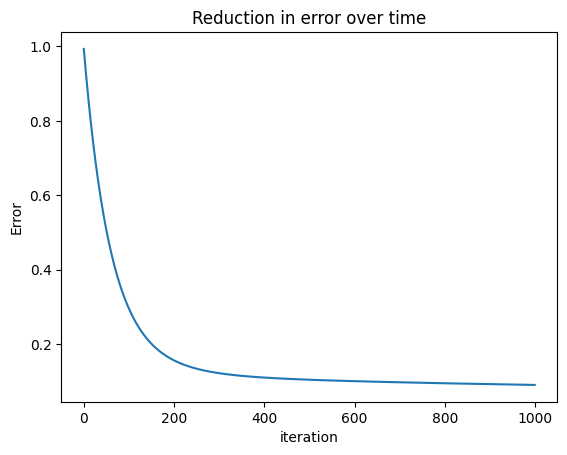

In [11]:
fig = plt.figure()
plt.plot(model.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

# **Model Interpretability**

In [12]:
!gdown 1tWCalxQ6gGXD6sRTskh9XTjAgFH0xcNF
!gdown 1Fp6e6vf_YID8qwCNHWSbvPH5-R3HQB5N
!gdown 14q4g4K3DjIi7v8Omej9za9EmOpUeLIEH
!gdown 1TSGIJi5vcXYd398KaJpn7RXvckmttYIt

Downloading...
From: https://drive.google.com/uc?id=1tWCalxQ6gGXD6sRTskh9XTjAgFH0xcNF
To: /content/cars24_x_train.pkl
100% 1.78M/1.78M [00:00<00:00, 156MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Fp6e6vf_YID8qwCNHWSbvPH5-R3HQB5N
To: /content/cars24_X_test.pkl
100% 762k/762k [00:00<00:00, 76.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=14q4g4K3DjIi7v8Omej9za9EmOpUeLIEH
To: /content/cars24_y_train.pkl
100% 112k/112k [00:00<00:00, 85.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TSGIJi5vcXYd398KaJpn7RXvckmttYIt
To: /content/cars24_y_test.pkl
100% 48.2k/48.2k [00:00<00:00, 76.3MB/s]


In [13]:
X_train = pd.read_pickle('/content/cars24_x_train.pkl')
X_test = pd.read_pickle("/content/cars24_X_test.pkl")
y_train = pd.read_pickle("/content/cars24_y_train.pkl")
y_test = pd.read_pickle("/content/cars24_y_test.pkl")

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
model.coef_ # W vectors

array([-0.22864076, -0.22718566,  0.06493271,  0.04101896, -0.20803904,
        0.06292526,  0.8680704 , -0.00692582, -0.00676553,  0.00537632,
        0.13338991,  0.01451176, -0.00704768, -0.0039257 , -0.01313206,
       -0.02020274])

In [16]:
model.intercept_ # bias

0.11212257190753999

In [17]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9485893510587335
0.8019230466998655


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'km_driven'),
  Text(1, 0, 'mileage'),
  Text(2, 0, 'engine'),
  Text(3, 0, 'max_power'),
  Text(4, 0, 'age'),
  Text(5, 0, 'make'),
  Text(6, 0, 'model'),
  Text(7, 0, 'Individual'),
  Text(8, 0, 'Trustmark Dealer'),
  Text(9, 0, 'Diesel'),
  Text(10, 0, 'Electric'),
  Text(11, 0, 'LPG'),
  Text(12, 0, 'Petrol'),
  Text(13, 0, 'Manual'),
  Text(14, 0, '5'),
  Text(15, 0, '>5')])

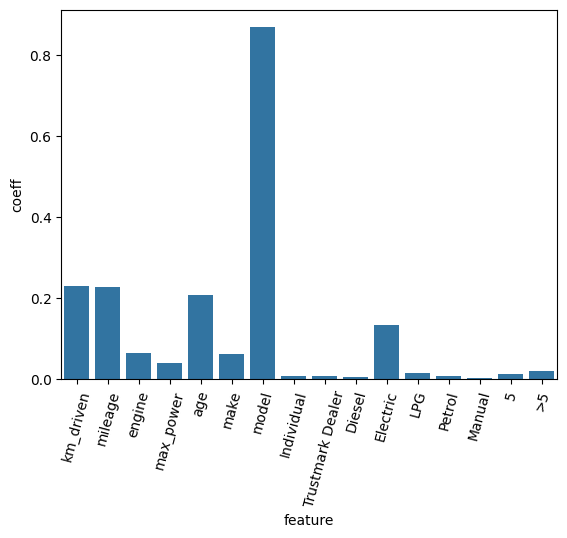

In [18]:
imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation = 75)

In [19]:
X_test.columns[np.argmax(np.abs(model.coef_))]

'model'

In [20]:
X_test.columns[np.argmin(np.abs(model.coef_))]

'Manual'

## **Stasmodel - OLS**

In [25]:
import statsmodels.api as sm

In [21]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [22]:
y=df[['selling_price']]
X=df.drop('selling_price', axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
y_train = np.array(y_train)

In [26]:
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Tue, 26 Nov 2024   Prob (F-statistic):               0.00
Time:                        04:08:45   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.664e-05      0.002  